In [1]:
import pandas as pd
import numpy as np
import os 

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [2]:
# !pip install pytorch_forecasting
# !pip install pytorch_lightning

In [3]:
import os 
import warnings

warnings.filterwarnings("ignore") 

In [4]:
import torch
torch.cuda.is_available()
import pandas as pd

### Importing Forex Dataset

In [5]:
data = pd.read_csv('dataset/final_data.csv', delimiter=",")


In [6]:
# Defining the time_index column
data = data.rename(columns={'Unnamed: 0': 'time_idx'})

In [7]:
data

,time_idx,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Treasury_Secretary_Yellen_Speech,United_States_Treasury_Secretary_Yellen_Testimony,United_States_Unemployment_Rate,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI
0,0,2012-04-09 00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13,-,...,-,-,-,-,-,-,-,-,-,-
1,1,2012-04-09 01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12,-,...,-,-,-,-,-,-,-,-,-,-
2,2,2012-04-09 02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12,-,...,-,-,-,-,-,-,-,-,-,-
3,3,2012-04-09 03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13,-,...,-,-,-,-,-,-,-,-,-,-
4,4,2012-04-09 04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61997,61997,2022-04-08 14:00:00,1.08861,1.08881,1.08592,1.08638,3897,0,0,-,...,-,-,-,-,-,-,-,-,-,-
61998,61998,2022-04-08 15:00:00,1.08637,1.08660,1.08504,1.08531,4443,0,0,-,...,-,-,-,-,-,-,-,-,-,-
61999,61999,2022-04-08 16:00:00,1.08531,1.08581,1.08364,1.08399,6250,0,0,-,...,-,-,-,-,-,-,-,-,-,-
62000,62000,2022-04-08 17:00:00,1.08399,1.08804,1.08388,1.08727,6825,0,0,-,...,-,-,-,-,-,-,-,-,-,-


In [8]:
data.columns

Index(['time_idx', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TICKVOL', 'VOL',
       'SPREAD', '10-Year_Note_Auction',
       ...
       'United_States_Treasury_Secretary_Yellen_Speech',
       'United_States_Treasury_Secretary_Yellen_Testimony',
       'United_States_Unemployment_Rate',
       'United_States_Unit_Labour_Costs_QoQ',
       'United_States_Wholesale_Inventories_MoM', 'WASDE_Report',
       'Wages_in_euro_zone', 'World_Economic_Forum_Annual_Meetings',
       'ZEW_Economic_Sentiment', 'procure_ch_PMI'],
      dtype='object', length=566)

In [9]:
special_days = data.columns[9:].tolist()
print(len(special_days))  

557


In [10]:
data = data.fillna('-', axis = 1)

In [11]:
# Replacing the 1s in all the special_days columns with respective names. (For proper categorical values)
data[special_days] = data[special_days].apply(lambda x: x.map({"1" : x.name})).astype("category") 

In [12]:
data = data.fillna('-', axis = 1)

In [13]:
data.head()

,time_idx,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Treasury_Secretary_Yellen_Speech,United_States_Treasury_Secretary_Yellen_Testimony,United_States_Unemployment_Rate,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI
0,0,2012-04-09 00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13,-,...,-,-,-,-,-,-,-,-,-,-
1,1,2012-04-09 01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12,-,...,-,-,-,-,-,-,-,-,-,-
2,2,2012-04-09 02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12,-,...,-,-,-,-,-,-,-,-,-,-
3,3,2012-04-09 03:00:00,1.30444,1.30524,1.3033,1.30508,2322,0,13,-,...,-,-,-,-,-,-,-,-,-,-
4,4,2012-04-09 04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12,-,...,-,-,-,-,-,-,-,-,-,-


In [14]:
data[data['10-Year_Note_Auction'] == '10-Year_Note_Auction'].head()

,time_idx,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Treasury_Secretary_Yellen_Speech,United_States_Treasury_Secretary_Yellen_Testimony,United_States_Unemployment_Rate,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI
60,60,2012-04-11 12:00:00,1.31377,1.31564,1.31322,1.31436,4461,0,6,10-Year_Note_Auction,...,-,-,-,-,-,-,-,-,-,-
540,540,2012-05-09 12:00:00,1.29753,1.29841,1.29651,1.29757,4273,0,5,10-Year_Note_Auction,...,-,-,-,-,-,-,-,-,-,-
1140,1140,2012-06-13 12:00:00,1.25454,1.25524,1.25315,1.25318,4757,0,5,10-Year_Note_Auction,...,-,-,-,-,-,-,-,-,-,-
1620,1620,2012-07-11 12:00:00,1.22759,1.22939,1.22714,1.22867,3462,0,5,10-Year_Note_Auction,...,-,-,-,-,-,-,-,-,-,-
2100,2100,2012-08-08 12:00:00,1.2361,1.23691,1.23451,1.23542,4552,0,5,10-Year_Note_Auction,...,-,-,-,-,-,-,-,-,-,-


In [15]:
import matplotlib.pyplot as plt
import numpy as np

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

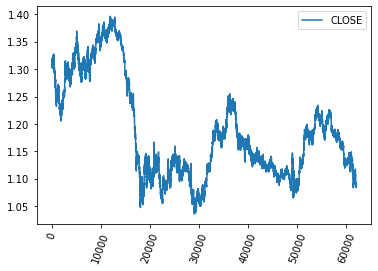

In [16]:
data['CLOSE'].astype(float).plot()
plt.legend()
plt.xticks(rotation = 70)

In [17]:
import time
import datetime

In [18]:
 data['DATE'] = pd.to_datetime(data['DATE'])


In [19]:
# Creating 1s of shape (len_data).  (We  only have one group (EUR_USD))
grp = pd.Series(np.ones((len(data))))  

In [20]:
data['grp'] = grp

In [21]:
# Creating new copy of dataset
new_df = data.copy()

In [22]:
# Naming each day from DATE column (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday)
new_df['day_of_week'] = new_df['DATE'].map(lambda x: x.day_name()).astype("category")

In [23]:
new_df[['DATE', 'day_of_week']]

,DATE,day_of_week
0,2012-04-09 00:00:00,Monday
1,2012-04-09 01:00:00,Monday
2,2012-04-09 02:00:00,Monday
3,2012-04-09 03:00:00,Monday
4,2012-04-09 04:00:00,Monday
...,...,...
61997,2022-04-08 14:00:00,Friday
61998,2022-04-08 15:00:00,Friday
61999,2022-04-08 16:00:00,Friday
62000,2022-04-08 17:00:00,Friday


In [24]:
new_df["month"] = new_df['DATE'].dt.month.astype(str).astype("category")
new_df["year"] = new_df['DATE'].dt.year.astype(str).astype("category")
new_df['year'] = new_df["year"].astype(int)
new_df['month'] = new_df["month"].astype(int)

In [25]:
# Converting columns to proper datatypes
new_df['OPEN'] = new_df["OPEN"].astype(float)
new_df['HIGH'] = new_df["HIGH"].astype(float)
new_df['CLOSE'] = new_df["CLOSE"].astype(float)
new_df['LOW'] = new_df["LOW"].astype(float)
new_df['TICKVOL'] = new_df["TICKVOL"].astype(float)
new_df['VOL'] = new_df["VOL"].astype(float)
new_df['SPREAD'] = new_df["SPREAD"].astype(int)

In [26]:
 new_df['time_idx'] = new_df['time_idx'].astype(int)

In [27]:
 new_df['grp'] = new_df['grp'].astype("str")

In [28]:
# for col in special_days:
#     new_df[col] = new_df[col].astype('category')

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62002 entries, 0 to 62001
Columns: 570 entries, time_idx to year
dtypes: category(1), datetime64[ns](1), float64(6), int64(4), object(558)
memory usage: 269.2+ MB


In [30]:
import copy
from pathlib import Path
import numpy as np
import pandas as pd

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters


### Create TimeSeries Dataset from our custom dataset

In [31]:
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet

max_encoder_length = 720 # As our data is in hours of each day (24hrs * 30) Sequence of 1 month for history
max_prediction_length =  720 #Same for prediction
training_cutoff = new_df["time_idx"].max() - max_prediction_length
    
timeseries = TimeSeriesDataSet(
     new_df,
    time_idx = "time_idx", 
    target = 'CLOSE',
    group_ids = ['grp'],
    min_encoder_length= max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["grp"],
    add_relative_time_idx=False,
    time_varying_known_reals=["time_idx", "OPEN", "HIGH", "LOW", "TICKVOL", "VOL", "SPREAD"],
    target_normalizer=GroupNormalizer(
        groups=["grp"], transformation="softplus"
    ),
    # variable_groups={"special_days": special_days}, 
    # time_varying_known_categoricals=["special_days", "day_of_week"],
    time_varying_unknown_categoricals=[], 
    add_target_scales=True, 
    add_encoder_length=True,
    time_varying_unknown_reals = ['CLOSE'],
    allow_missing_timesteps=True)

In [32]:
timeseries.get_parameters() 

{'time_idx': 'time_idx',
 'target': 'CLOSE',
 'group_ids': ['grp'],
 'weight': None,
 'max_encoder_length': 720,
 'min_encoder_length': 360,
 'min_prediction_idx': 0,
 'min_prediction_length': 1,
 'max_prediction_length': 720,
 'static_categoricals': ['grp'],
 'static_reals': ['encoder_length', 'CLOSE_center', 'CLOSE_scale'],
 'time_varying_known_categoricals': [],
 'time_varying_known_reals': ['time_idx',
  'OPEN',
  'HIGH',
  'LOW',
  'TICKVOL',
  'VOL',
  'SPREAD'],
 'time_varying_unknown_categoricals': [],
 'time_varying_unknown_reals': ['CLOSE'],
 'variable_groups': {},
 'constant_fill_strategy': {},
 'allow_missing_timesteps': True,
 'lags': {},
 'add_relative_time_idx': False,
 'add_target_scales': True,
 'add_encoder_length': True,
 'target_normalizer': GroupNormalizer(groups=['grp'], transformation='softplus'),
 'categorical_encoders': {'__group_id__grp': NaNLabelEncoder(),
  'grp': NaNLabelEncoder()},
 'scalers': {'encoder_length': StandardScaler(),
  'CLOSE_center': Standard

In [33]:
 timeseries.index

,time_first,time_last,time_diff_to_next,index_start,time,count,group_id,index_end,sequence_length
0,0,62001,1,0,0,62002,0,1439,1440
1,0,62001,1,1,1,62002,0,1440,1440
2,0,62001,1,2,2,62002,0,1441,1440
3,0,62001,1,3,3,62002,0,1442,1440
4,0,62001,1,4,4,62002,0,1443,1440
...,...,...,...,...,...,...,...,...,...
63076,0,62001,1,0,0,62002,0,1434,1435
63077,0,62001,1,0,0,62002,0,1435,1436
63078,0,62001,1,0,0,62002,0,1436,1437
63079,0,62001,1,0,0,62002,0,1437,1438


### Creating Training and Validation dataloaders

In [34]:
validation = TimeSeriesDataSet.from_dataset(timeseries, new_df, predict = True, stop_randomization = True)

batch_size = 128
training_dataloader = timeseries.to_dataloader(train=True, batch_size = batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size = batch_size*100, num_workers=0)

In [35]:
x, y = next(iter(training_dataloader))
# print("x =", x)
# print("\ny =", y)
# print("\nsizes of x =")
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

	encoder_cat = torch.Size([128, 720, 1])
	encoder_cont = torch.Size([128, 720, 11])
	encoder_target = torch.Size([128, 720])
	encoder_lengths = torch.Size([128])
	decoder_cat = torch.Size([128, 720, 1])
	decoder_cont = torch.Size([128, 720, 11])
	decoder_target = torch.Size([128, 720])
	decoder_lengths = torch.Size([128])
	decoder_time_idx = torch.Size([128, 720])
	groups = torch.Size([128, 1])
	target_scale = torch.Size([128, 2])


### Baseline Model Prediction

In [36]:
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer

actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
torch.Tensor.float(actuals - baseline_predictions).abs().mean().item()

0.021873852238059044

### Finding Optimal Learning Rate

In [37]:
import pytorch_lightning as pl
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# pl.seed_everything(42)
trainer = pl.Trainer(
gpus=1,  
)

tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=2,
dropout=0.1,
hidden_continuous_size=8,
output_size=3,
loss=QuantileLoss([0.1, 0.5, 0.9]),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 25.2k


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Finding best initial lr: 100%|██████████| 100/100 [02:26<00:00,  1.47s/it]


suggested learning rate: 0.46773514128719856


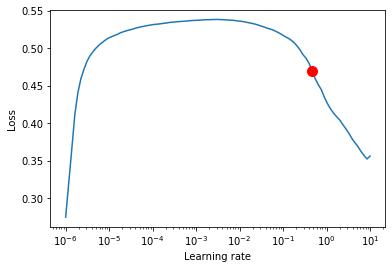

In [38]:
res = trainer.tuner.lr_find(
tft,
train_dataloaders=training_dataloader,
    val_dataloaders = val_dataloader,
    max_lr = 10.0,
    min_lr=1e-6,
)


print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

### Training TFT model

In [39]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=25,
    gpus=1,
    weights_summary="top",
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=2,
dropout=0.1,
hidden_continuous_size=8,
output_size=3,
loss=QuantileLoss([0.1, 0.5, 0.9]),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 25.2k


In [40]:
trainer.fit(
    tft,
    train_dataloaders=training_dataloader,
    val_dataloaders=val_dataloader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1     
3  | prescalers                         | ModuleDict                      | 176   
4  | static_variable_selection          | VariableSelectionNetwork        | 1.8 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 5.1 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 4.4 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lst

Epoch 19: 100%|██████████| 31/31 [00:44<00:00,  1.44s/it, loss=0.000918, v_num=7, train_loss_step=0.000984, val_loss=0.000723, train_loss_epoch=0.000823]


#### Loading the model from checkpoint

In [41]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [42]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [43]:
raw_predictions_test, x_test = best_tft.predict(val_dataloader, mode="quantiles", return_x=True)

#### Plotting Prediction

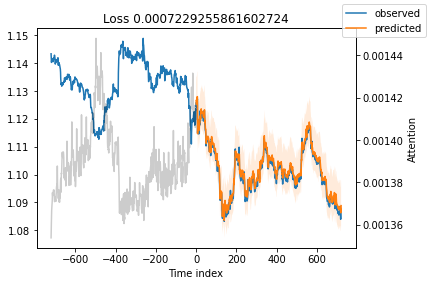

<Figure size 2880x1440 with 0 Axes>

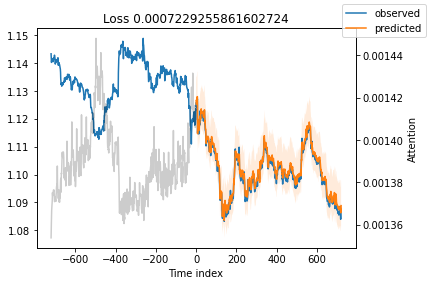

In [54]:
plt.figure(figsize=(40,20))
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True)

### Interpretation Analysis

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x216 with 1 Axes>,
 'encoder_variables': <Figure size 504x288 with 1 Axes>,
 'decoder_variables': <Figure size 504x270 with 1 Axes>}

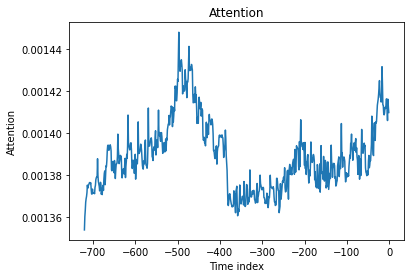

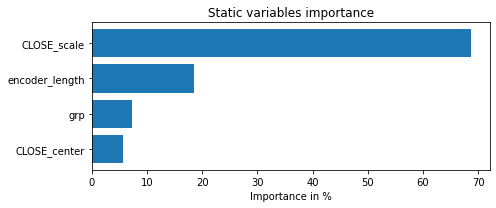

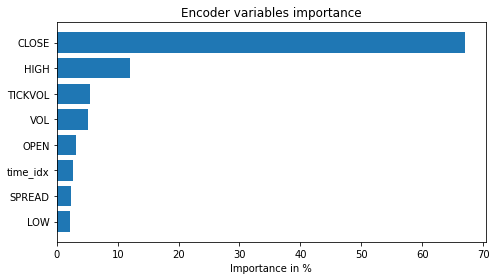

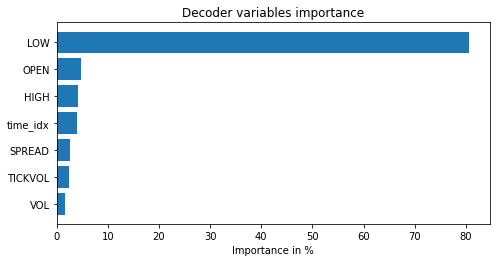

In [45]:
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)

In [48]:
from pytorch_forecasting.metrics import RMSE, MAE

rmse = RMSE(reduction = 'sqrt-mean')
pred = best_tft.predict(val_dataloader, mode = 'prediction', return_x = False)
rmse_loss = rmse.loss(pred, actuals)
rmse_loss.mean()

tensor(1.8104e-06)

In [52]:
mae = MAE(reduction = 'mean')
pred = best_tft.predict(val_dataloader, mode = 'prediction', return_x = False)
mae_loss = mae.loss(pred, actuals)
mae_loss.mean()

tensor(0.0012)

In [55]:
# raw_predictions_test.shape
x1 = np.concatenate([x_test['encoder_target'], x_test['decoder_target']], axis = 1)
# raw_predictions_test.shape
x1 = x1.reshape(-1)
x1.shape

(1440,)

In [56]:
q1 = np.concatenate([[np.nan] * 720, raw_predictions_test[:,:,0].squeeze(0)])
q1 = q1.reshape(-1)
q2 = np.concatenate([[np.nan] * 720, raw_predictions_test[:,:,1].squeeze(0)])
q2 = q2.reshape(-1)
q3 = np.concatenate([[np.nan] * 720, raw_predictions_test[:,:,2].squeeze(0)])
q3 = q3.reshape(-1)

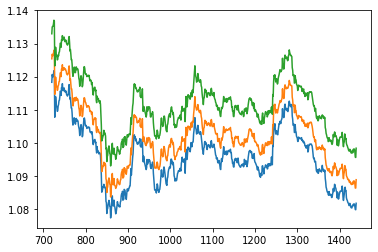

In [57]:
plt.plot(q1)
plt.plot(q2)
plt.plot(q3)
# plt.fill_between(q1, q3)

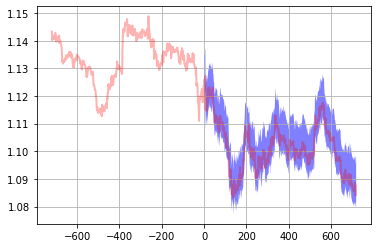

In [73]:
t = np.arange(-720, 720)
fig, ax = plt.subplots(1)
ax.plot(t, x1, lw=2, label='Quantile Predictions', color='red', alpha = 0.3)
# ax.plot(t, q2, lw=2, label='mean population 2', color='blue')
ax.fill_between(t, q1, q3, facecolor='blue', alpha=0.5)
# ax.fill_between(t, q3, , facecolor='yellow', alpha=0.5)
# ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
# ax.legend(loc='upper left')
# ax.set_xlabel('num steps')
# ax.set_ylabel('position')
ax.grid()